In [1]:
!pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


### 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data_21 = pd.read_csv("D19.csv", header=0)
data_24 = pd.read_csv("GP24.csv", header=0)

In [43]:
print(data_21.head(), len(data_21))
print("\n----------------------------------------------\n")
print(data_24.head())

  BookingReference Created Date Reference Attendee Status Attended
0          B739461   16/07/2019   A802512       Cancelled      NaN
1          B739462   16/07/2019   A802513       Attending      Yes
2          B739463   16/07/2019   A802514       Attending      Yes
3          B739464   16/07/2019   A802515       Attending       No
4          B739465   16/07/2019   A802516       Attending       No 1185

----------------------------------------------

  BookingReference Created Date Reference Attendee Status Attended
0         B1267663   15/04/2024  A1341916       Attending      NaN
1         B1267680   15/04/2024  A1341933       Attending      NaN
2         B1267725   15/04/2024  A1341978       Attending      Yes
3         B1267726   15/04/2024  A1341979       Attending      NaN
4         B1267733   15/04/2024  A1341986       Cancelled      NaN


#### 

In [6]:
report = data_21.info()
print(report)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BookingReference  798 non-null    object 
 1   Created Date      798 non-null    object 
 2   Reference         798 non-null    object 
 3   Attendee Status   798 non-null    object 
 4   Attended          0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 31.3+ KB
None


The `.info()` method creates a data description of the GP21 dataframe. It tells us:

- How many rows (798)
- How many columns (5)
- Column names
- How many values are non-null for each column (Attended has 0 non-null values)
- The types of data contained within each column (Objects)
- The size of the dataset loaded into memory (~31.3+ KB)

In [7]:
report = data_24.info()
print(report)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   BookingReference  317 non-null    object
 1   Created Date      317 non-null    object
 2   Reference         317 non-null    object
 3   Attendee Status   317 non-null    object
 4   Attended          243 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB
None


The `.info()` method creates a data description of the GP24 dataframe. It tells us:

- How many rows (317)
- How many columns (5)
- Column names
- How many values are non-null for each column (Attended has 243 non-null values)
- The types of data contained within each column (Objects)
- The size of the dataset loaded into memory (~12.5+ KB)

#### Check for Unique Values

In [5]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)


def plot_categorical_distribution(data: pd.DataFrame = None,
                                  column: str = None,
                                  height: int = 8,
                                  aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count',
                  height=height, aspect=aspect).set(title=f'Distribution of {column}')

In [39]:
data_srm23 =  pd.read_csv(".csv", header=1)

In [40]:
get_unique_values(data_srm23, 'Attendee Status')

Column: Attendee Status has 2 unique values

Attendee Status
Attending    232
Cancelled     79
Name: count, dtype: int64


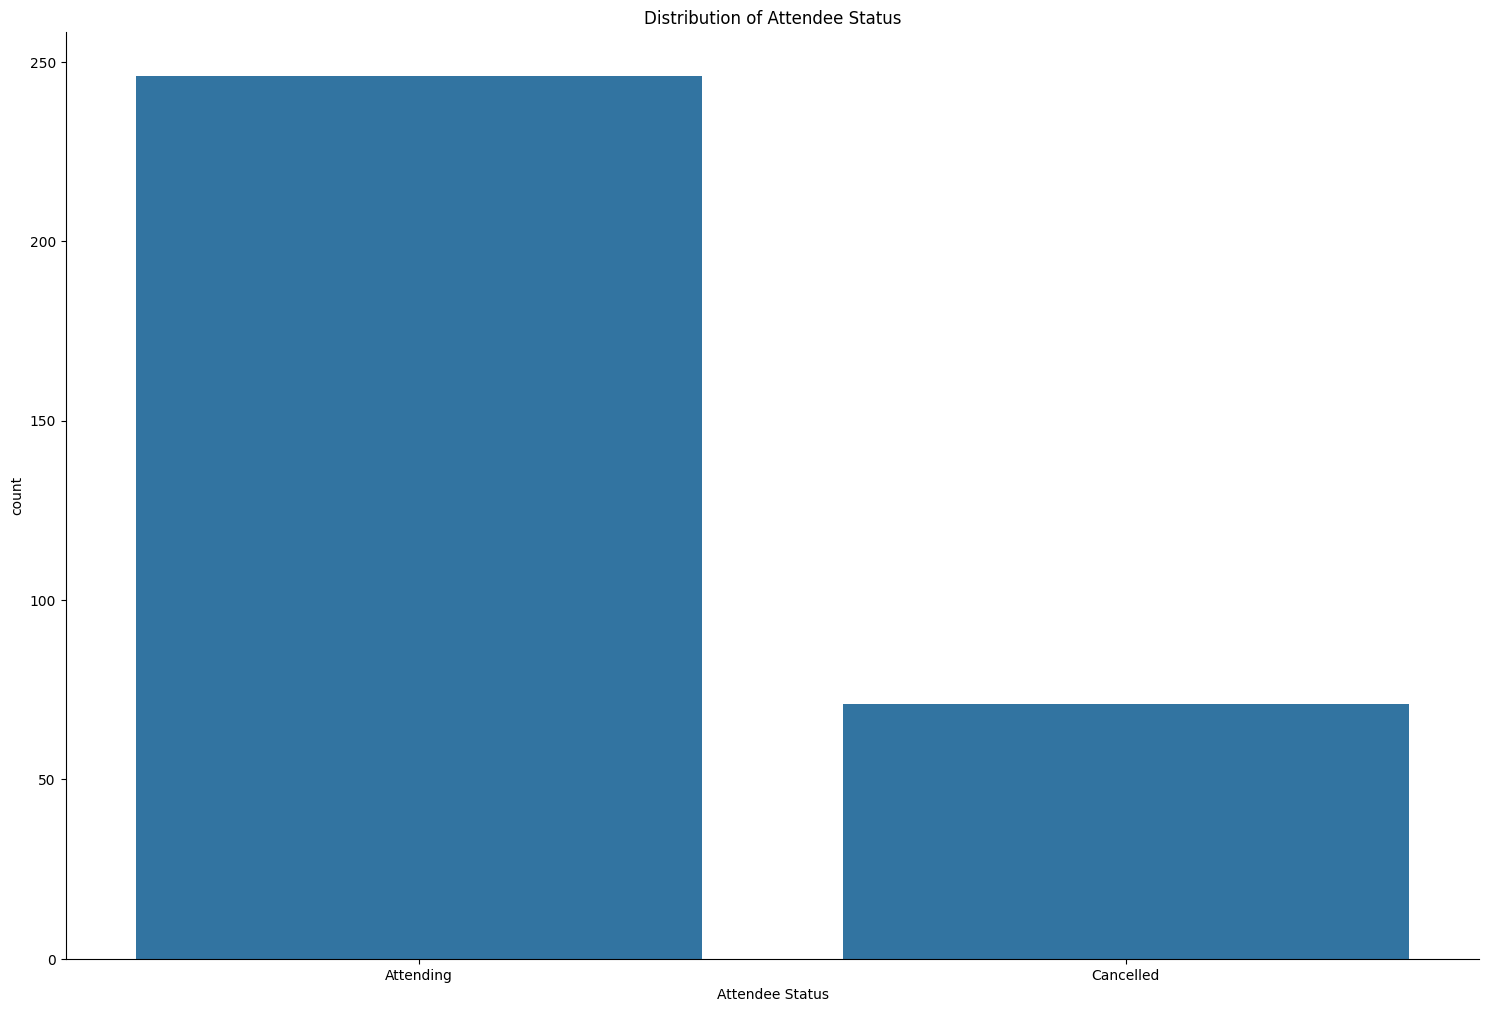

In [47]:
plot_categorical_distribution(data_24, 'Attendee Status', height=10, aspect=1.5)

In [20]:
get_unique_values(data_21, 'Attendee Status')

Column: Attendee Status has 2 unique values

Attendee Status
Attending    767
Cancelled     31
Name: count, dtype: int64


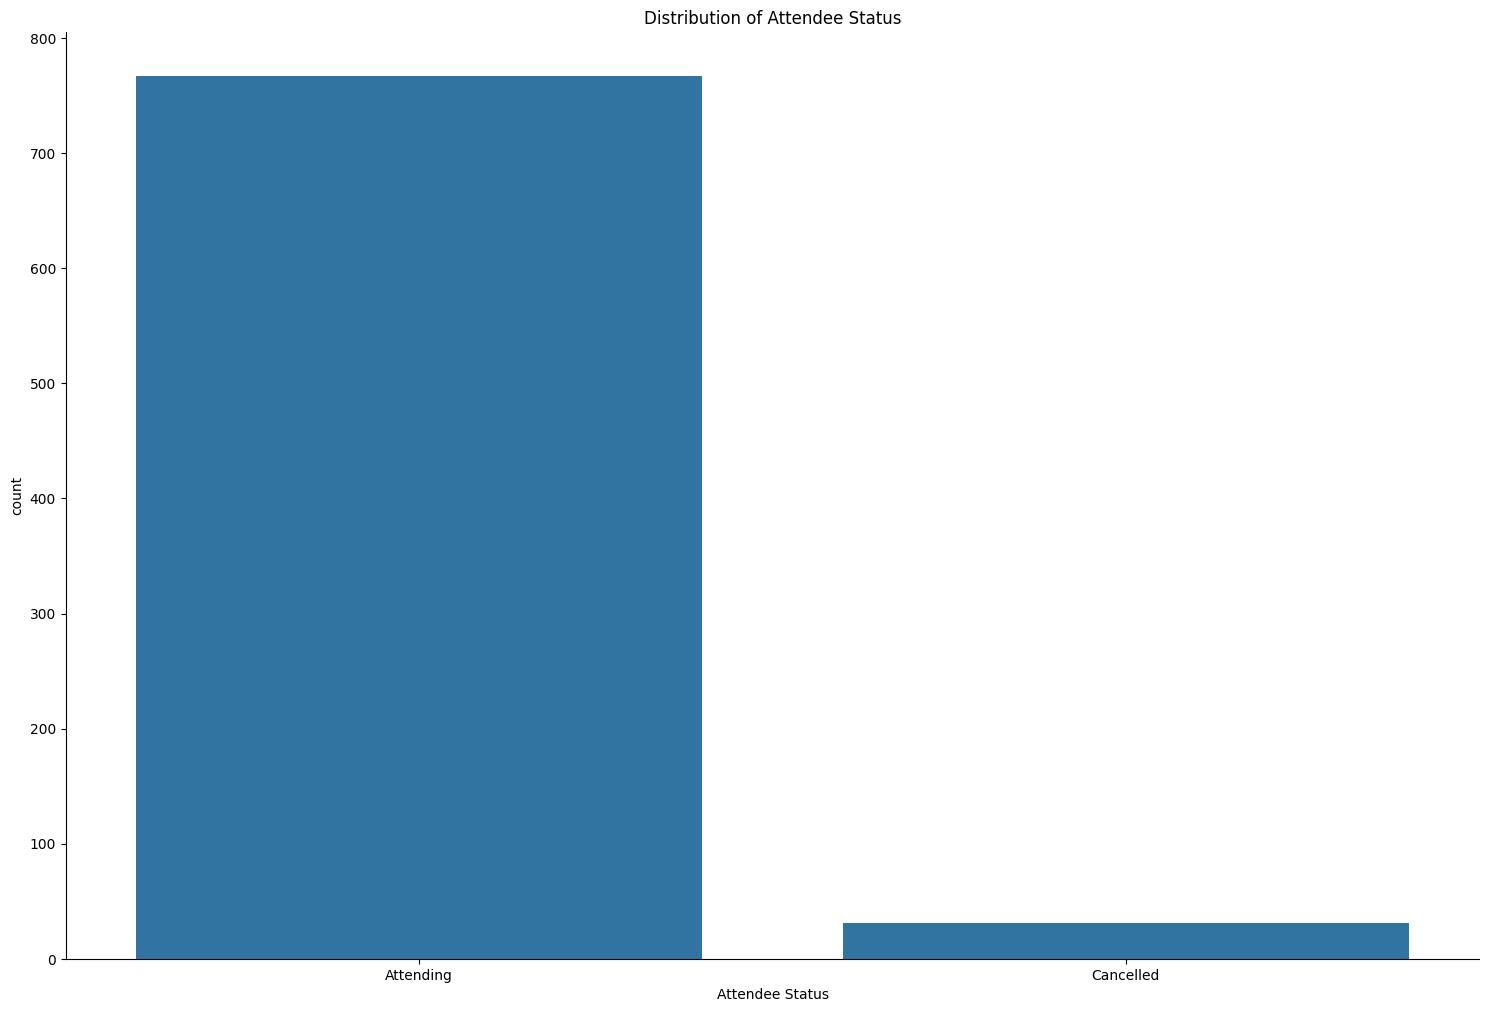

In [18]:
plot_categorical_distribution(data_21 ,'Attendee Status', height=10, aspect=1.5)

#### DATE HANDLING

In [21]:
get_unique_values(data_21, 'Created Date')

Column: Created Date has 83 unique values

Created Date
21/10/2020    72
02/03/2021    58
10/03/2021    43
29/03/2021    39
21/04/2021    29
              ..
24/02/2021     1
28/03/2021     1
21/03/2021     1
13/03/2021     1
10/04/2021     1
Name: count, Length: 83, dtype: int64


The column named `Created Date` appears to be categorical, but in actual fact it's not. This is a datetime, following the format of `2022-03-01 10:00:45 = YYYY-MM-DD HH:MM:SS`. Therefore, the column should be transformed to reflect its true form.

In [28]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%d/%m/%Y')
  return dummy

In [33]:
df1 = convert_to_datetime(data_21, 'Created Date')
df2 = convert_to_datetime(data_24, 'Created Date')

In [48]:
print(df1.head())
print("\n----------------------------------------------\n")
print(df2.head())

  BookingReference Created Date Reference Attendee Status  Attended
0          B816298   2020-02-06   A883509       Attending       NaN
1          B816298   2020-02-06   A883510       Attending       NaN
2          B893470   2020-10-21   A961305       Attending       NaN
3          B893472   2020-10-21   A961307       Attending       NaN
4          B893474   2020-10-21   A961309       Attending       NaN

----------------------------------------------

  BookingReference Created Date Reference Attendee Status Attended
0         B1267663   2024-04-15  A1341916       Attending      NaN
1         B1267680   2024-04-15  A1341933       Attending      NaN
2         B1267725   2024-04-15  A1341978       Attending      Yes
3         B1267726   2024-04-15  A1341979       Attending      NaN
4         B1267733   2024-04-15  A1341986       Cancelled      NaN


In [49]:
df1.info()
print("\n----------------------------------------------\n")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BookingReference  798 non-null    object        
 1   Created Date      798 non-null    datetime64[ns]
 2   Reference         798 non-null    object        
 3   Attendee Status   798 non-null    object        
 4   Attended          0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 31.3+ KB

----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BookingReference  317 non-null    object        
 1   Created Date      317 non-null    datetime64[ns]
 2   Reference         317 non-null    object        
 3   Attendee Status   

In [51]:
df = df1.sort_values('Created Date')

In [53]:
df.head(15)

,BookingReference,Created Date,Reference,Attendee Status,Attended
0,B816298,2020-02-06,A883509,Attending,NaN
1,B816298,2020-02-06,A883510,Attending,NaN
54,B893584,2020-10-21,A961423,Attending,NaN
53,B893581,2020-10-21,A961420,Attending,NaN
52,B893580,2020-10-21,A961419,Attending,NaN
51,B893579,2020-10-21,A961418,Attending,NaN
50,B893573,2020-10-21,A961412,Attending,NaN
49,B893565,2020-10-21,A961404,Attending,NaN
47,B893558,2020-10-21,A961397,Attending,NaN
46,B893555,2020-10-21,A961394,Attending,NaN


In [54]:
daily_registrations = df.groupby('Created Date').size().reset_index()

daily_registrations.head(10)

,Created Date,0
0,2020-02-06,2
1,2020-10-21,72
2,2020-10-22,15
3,2020-10-23,4
4,2020-10-26,3
5,2020-10-28,6
6,2020-11-02,1
7,2020-11-04,1
8,2020-11-05,1
9,2020-11-06,5
